In [47]:
#aux
import os
import json

# Data
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

#avoid all the user warnings from pandas
import warnings
warnings.filterwarnings('ignore')


In [48]:
# get all the jsons from a folder, read them into a dataframe and concatenate them
path = r'../data/metrics'
all_files = os.listdir(path)
li = []
for filename in all_files:
    with open(os.path.join(path, filename)) as f:
        data = json.load(f)
        li.append(pd.DataFrame(data))
df = pd.concat(li, axis=0, ignore_index=True)

# Open the dictionary and add it to the dataframe
df = df.join(pd.DataFrame(df['metrics'].tolist()))
df.sort_values(by=['dataset','method','ml_algorithm','k'], inplace=True)
# Round K for plots
df['k'] = np.round(df['k'].astype(float), 2)
df

,dataset,method,k,ml_algorithm,metrics,RMSE,classification_report,ROCAUC
69,adult,classic_mondrian,109.0,randomforest,{'classification_report': {'0': {'precision': ...,NaN,"{'0': {'precision': 0.7805899807994414, 'recal...",0.810867
155,adult,classic_mondrian,109.0,randomforest,{'classification_report': {'0': {'precision': ...,NaN,"{'0': {'precision': 0.7695258019525802, 'recal...",0.790632
57,adult,classic_mondrian,135.0,randomforest,{'classification_report': {'0': {'precision': ...,NaN,"{'0': {'precision': 0.7844174158293672, 'recal...",0.804506
143,adult,classic_mondrian,135.0,randomforest,{'classification_report': {'0': {'precision': ...,NaN,"{'0': {'precision': 0.7737316598904013, 'recal...",0.784287
81,adult,classic_mondrian,161.0,randomforest,{'classification_report': {'0': {'precision': ...,NaN,"{'0': {'precision': 0.792191435768262, 'recall...",0.803318
...,...,...,...,...,...,...,...,...
98,cahousing,classic_mondrian,83.0,xgboost,{'RMSE': 58368.1278536016},58368.127854,NaN,NaN
1,cahousing,no_anonimization,0.0,randomforest,{'RMSE': 55024.38196088925},55024.381961,NaN,NaN
87,cahousing,no_anonimization,0.0,randomforest,{'RMSE': 57471.32675413833},57471.326754,NaN,NaN
0,cahousing,no_anonimization,0.0,xgboost,{'RMSE': 44999.490532855656},44999.490533,NaN,NaN


In [49]:
def plot_dataset_performance(dataset_name:str,
                             metric_name:str,
                             metrics_df):
    df = metrics_df[metrics_df['dataset'] == dataset_name]
    # create two subplots, one for each algorithm type
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    # set the title of the plot
    fig.suptitle(f'{dataset_name} - {metric_name}')
    # set the title of the first subplot
    ax1.set_title('Random Forest')
    # set the title of the second subplot
    ax2.set_title('XGBoost')
    # plot the random forest performance
    sns.lineplot(data=df[(metrics_df['ml_algorithm'] == 'randomforest') & (df['method'] != 'no_anonimization')],
                 x='k',
                 y=metric_name,
                 hue='method',
                 ax=ax1)


    #plot a horizontal line for the random forest performance with no anonimization
    ax1.axhline(df[(metrics_df['ml_algorithm'] == 'randomforest') & (df['method'] == 'no_anonimization')][metric_name].values[0],
                color='red',
                linestyle='--',
                label='no anonimization baseline')
    # ax1.set_xticks(ax1.get_xticks()[::2])
    # add it to the legend
    ax1.legend()


    # plot the xgboost performance
    sns.lineplot(data=df[(metrics_df['ml_algorithm'] == 'xgboost') & (df['method'] != 'no_anonimization')],
                 x='k',
                 y=metric_name,
                 hue='method',
                 ax=ax2)
    #plot a horizontal line for the xgboost performance with no anonimization
    ax2.axhline(df[(metrics_df['ml_algorithm'] == 'xgboost') & (df['method'] == 'no_anonimization')][metric_name].values[0],
                color='red',
                linestyle='--',
                label='no anonimization baseline')
    # add it to the legend
    ax2.legend()

    # show the plot
    plt.show()


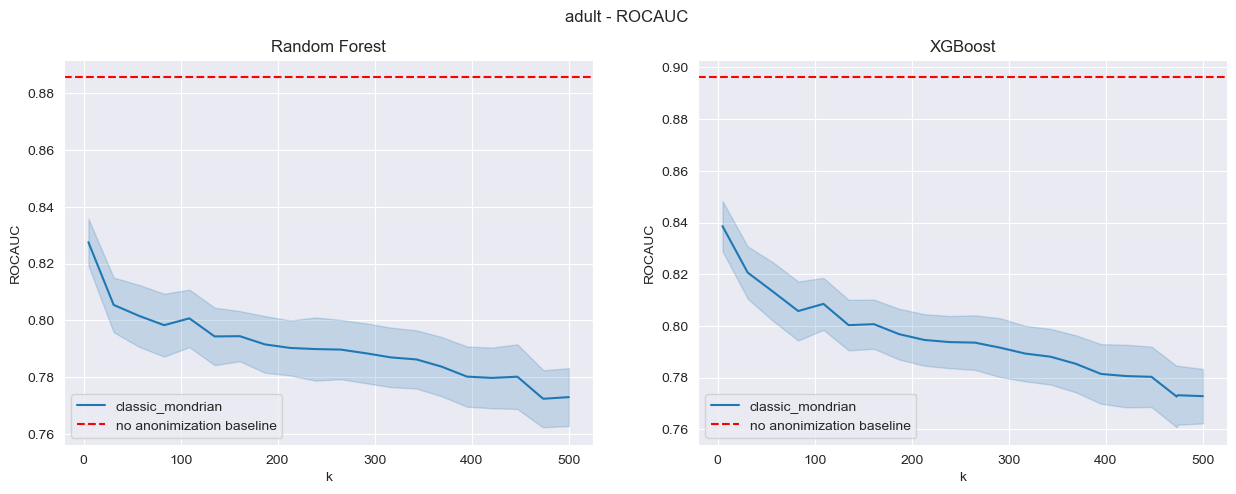

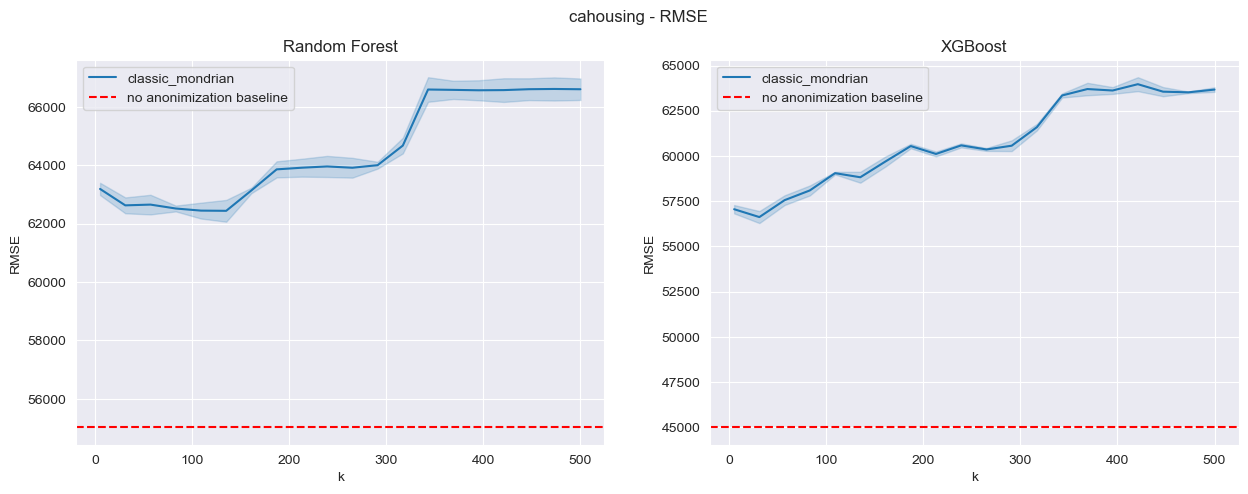

In [50]:
plot_dataset_performance('adult', 'ROCAUC', df)
plot_dataset_performance('cahousing', 'RMSE', df)